<a href="https://colab.research.google.com/github/marcmarzo/GIS-Marc/blob/master/2_webmaps_and_distributions_Marc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting started ### 

<font color='orangered'> ~ déjà vu ~</font> if you haven't already done so: You need your own copy of this notebook. Go to "File" and 'save a copy in github' (give access if needed.... put it into the repository you made for this course). Now you have your own copy of the notebook. Click 'open in colab' to get started working on the practical exercise.

# Interactive maps and looking more at distributions

<font color='orangered'> ~ déjà vu ~</font> Last week, we focused on making "mostly static" maps, that is maps where you mostly just expect your user to look at the end-product, the map, you've prepared. We looked at a research question visualizing the distribution of Iron Age sites in Central Italy, and we focused the practical exercise on using the map for:
  * data exploration => filtering and creating subsets of data to show different aspects of the overall dataset, one at a time
  * visualisation => zoom level (visual balance), visual variables (symbols, fonts, generalisation, color) 
  * organisation => Balancing geospatial and attribute (descriptive) data, and which attributes will be emphasized in a given map

<font color='magenta'> ~ new ~</font> This week we'll continue exploring different types of maps. Specifically, we'll look at making maps where interactivity is a key part of the design. We'll see how interactivity allows you to include more variables and more information in a single map.

Beyond the question of how to present spatial data (i.e. designing the map), we will spend time on an important topic in archaeology: **spatial distributions**. Spatial distributions are patterns in space. Are things clustered together or spaced out regularly or randomly distributed?

*Types of Distribution: Data Sampling*


<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Distribution.png?raw=1" width="400"/> </div> 

*Examples of Applications*

<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Examples%20of%20applications.png?raw=1" width="500"/> </div> 

Central to investigating spatial distributions (patterns) is our ability to manipulate and rearrange spatial data, as we work to answer spatially explicit questions. <font color='grey'> 
  
###This practical lab will provide you ways to do so through:

  * transforming database 
  * merging  database
  * creating layers
 </font>  



##Start by getting tools, always



In [0]:
#codecell_Webmaps&Distributions_ImportUrLibraries

#Like last time, get the tools we need at the start
import pandas as pd
import folium
import numpy as np

in #codecell__Webmaps&Distributions_ImportUrLibraries:

<font color='orangered'> ~ déjà vu ~</font> Last week, we worked with the folium, branca and pandas libraries. 

<font color='magenta'> ~ new ~</font> This week, you still be working with panda and folium and you will be replacing the branca library with [numpy](https://numpy.org/). 

## And then by getting the data

This week we are working with the data from the Antikythera survey project.


It's citation is: Bevan, A. and Conolly, J. 2012. Intensive Survey Data from Antikythera, Greece. **Journal of Open Archaeology Data** 1(1), DOI: http://dx.doi.org/10.5334/4f3bcb3f7f21d.

This data has been made available at the Archaeological Data Service (ADS) archive at https://archaeologydataservice.ac.uk/archives/view/antikythera_ahrc_2012/ and completely open for re-use. You can [see](https://archaeologydataservice.ac.uk/archives/view/antikythera_ahrc_2012/stats.cfm) how many times their database has been viewed and downloaded. 


### Open Data

Last week we mentioned open source software. Open data operates under the same broad ethos, and follows many of the same principles. Sharing, reuse, and attribution are key. If you continue to reuse the Antikythera data, be sure to continue to link back to and cite the source.

Perhaps the most relevant example in the UK is **OS (Ordnance survey) OpenData** which was made freely available for the first time in 2010. Last review ([2018](https://www.ordnancesurvey.co.uk/business-government/tools-support/open-data-support)) counted 1.9 million open data downloads, the equivalent of 150 people download OS OpenData every day!

2015 has seen Environmental Agency made **lidar (light detection and ranging)** data available to the public, for free, as open data. Within the first year of release 500,000 lidar downloads were made equating to nearly 13 million km2 of data! 


### Working with other people's data: the case of Antikythera 

Have a quick look around the dataset as it's described on the ADS site. You'll notice that they've split up their dataset in ways that made sense to them at the time. Specifically they've divided up the artefact data into three discrete elements: 'pottery', 'lithics' and 'other' into separate files (very much like we did last week by filtering and creating a subset). This is a pretty normal archaeological data thing to do. 

Here's the trick, we want to focus on both **ceramics and small finds** and to look at these datasets together. This means you'll have to grab both of them and combine them. When you are combining the, you will also need to re-organize the attribute data in order to reuse it for something new. This follows the model of a <font color='magenta'> **relational database** </font>(google this if if you are curious about different ways of combining data).

In [0]:
#codecell_Webmaps&Distributions_OrganisingUrdata

#Like last time, get the data we'll need at the start. I've been nice again and converted their coordinates to latitude and longitude for you. 
#You'll learn to do this yourself later in the course.

# we label the first dataset 'pottery'
pottery = pd.read_csv('https://raw.githubusercontent.com/ropitz/spatialarchaeology/master/data/antikythera_survey_pottery.csv')

# we label the second dataset 'small finds'
small_finds = pd.read_csv('https://raw.githubusercontent.com/ropitz/spatialarchaeology/master/data/antikythera_survey_small_finds.csv')



In [48]:
#codecell_Webmaps&Distributions_CheckingZeData

#let's check the individual pottery file.  
pottery.head()

,OID_,UID,Xsugg,Ysugg,Type_,Unit,Walker,PassGrid,Section_,SherdNo,VesselPart,PartType,VesselType,OtherType,Thickness,Coarseness,MaxSize,Feature,Comments,FabricType,MNLN,FNEB1,EB2,LPrePal,FPal,SPal,TPal,PPalPG,Geom,Arch,Class,Hell,ERom,MRom,LRom,EByz,MByz,EVen,MVen,LVen,Recent,Other,DDLat,DDLon,ORIG_OID
0,NaN,0075-7135-S-37,710076.1,3967135.2,grid,0075-7135,59,37,S,37,R,RR,JCon,Lamboglia 2,M,F,4.1,Y,"Lamboglia 2 amphora, rim. Quite fine and fairl...",Adriatic amphora fabric,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,35.825904,23.325570,1
1,NaN,0095-7135-V-1,710098.2,3967133.6,grid,0095-7135,29,37,V,1,B,U,U,U,M,C,2.4,N,NaN,GRO(b?),0,70,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.825885,23.325814,2
2,NaN,0105-7155-S-1,710106.1,3967152.2,grid,0105-7155,28,37,S,1,Ba,BF,U,U,Tk,C,5.1,Y,Base from medium to large sized vessel,SAT,0,0,20,20,20,20,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.826051,23.325906,3
3,NaN,0115-7265-V-1,710111.3,3967265.8,grid,0115-7265,21,51,V,1,B,U,U,U,M,C,1.9,N,NaN,GRO(b?),0,70,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.827073,23.325993,4
4,NaN,0125-7115-S-1,710111.1,3967121.2,grid,0115-7125,49,37,S,1,L?,U,CPot?,U,M,C,6.2,Y,Highly abraded small ovoid leg,MUT,0,0,10,10,30,30,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.825770,23.325953,5


In [49]:
#codecell_Webmaps&Distributions_CheckingZeData

#let's check the individual pottery file to see 
small_finds.head()

,OID_,UID,Xsugg,Ysugg,Type_,Unit,Walker,Pass_Grid,Section_,ObjNo,Object,Material,MaxSize,Comments,MN_LN,FN_EB1,EB2,FMin,FPal,SPal,TPal,PPal_PG,Geometric,Archaic,Class,Hell,ERom,MRom,LRom,EByz,MByz,EVen,MVen,LVen,Recent,Other,TOTAL,DDLat,DDLon,ORIG_OID
0,NaN,0075-7135-S-1,700074.1,3967139.0,grid,0075-7135,59,37.0,S,1,lump,slag,3.9,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,100,35.828029,23.214923,1
1,NaN,0075-7135-V-1,700075.2,3967136.4,grid,0075-7135,59,37.0,V,1,lump,slag,2.4,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,100,35.828006,23.214935,2
2,NaN,0075-7135-V-2,700070.5,3967132.1,grid,0075-7135,59,37.0,V,2,lump,slag,1.8,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,100,35.827968,23.214882,3
3,NaN,0085-7135-V-1,700088.3,3967132.7,grid,0085-7135,28,37.0,V,1,lump,slag,2.7,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,100,35.827970,23.215079,4
4,NaN,0085-7135-V-2,700081.7,3967135.5,grid,0085-7135,28,37.0,V,2,lump,slag,2.8,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,100,35.827996,23.215007,5




---


###Learning a new language – decomposing the code
<font color='orangered'> ~ déjà vu ~</font> in #codecell__Webmaps&Distributions_CheckingZeData:

* **=**    allows you to provide a new name, often more convenient than the link pathname
* **pd.read_csv** allows you to open a CSV format file

* **.head() function** take a peek at the first part of the dataset 


---


Now have a look at these two datasets and how they are structured. Also, the coordinates have been transformed for you from cartesian co-ordinates (a grid system - shown in column *'Xsugg' &	'Ysugg'*) back to latitude/longitude (geodetic system - shown in column *'DDlat' &	'DDlong'*). Below is a very crude diagram demonstrating this transformation. 

*The relationship between Geographic (top left image)& Cartesian coordinates (bottom left image)*

<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/x&y_webmaps&distribution_2.png?raw=1" width="350"/> </div><img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Geographic%20&%20Cartesian%20Coordinates.png?raw=1" width="300"/> </div>


While the conversion from geodetic to cartesian is fairly straightforward, converting cartesian to geodetic is a complex problem (& if you are interested on how this is done mathematically have a look at [this](https://www.movable-type.co.uk/scripts/latlong-os-gridref.html)).


---



In [0]:
#codecell_Webmaps&Distributions_Concatenation

# then we combine the two datasets together to make a big dataset we call 'survey data'
survey_data = pd.concat([pottery,small_finds], sort=False, ignore_index=True)

##Learning a new language – decomposing the code

Codecell__Webmaps&Distributions_Concatenation can be decomposed like this:
  
![](https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Webmaps&Distributions_Concatenation_.jpg?raw=1)



---


* **Reminder**: an array is a group of elements/objects/items organised as a set where columns (of equal size) are multiplied by rows (of equal size). The advantage of using arrays is that  all elements can be accessed at any time randomly. Last week, you had done something similar to call all items from the range [i] ( <font color='crimson'>in #codecell_makeabasicmap_BringingUrData2theMap </font>). This week, you are linking together 2 arrays. Pandas library provides various ways to combine together Series or DataFrame such as merge, join and concatenate ([see user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)). 


---




Let's make sure nothing went wrong...

In [51]:
#codecell_Webmaps&Distributions_CheckingZeData

#check things loaded in and combined OK
survey_data.head()

,OID_,UID,Xsugg,Ysugg,Type_,Unit,Walker,PassGrid,Section_,SherdNo,VesselPart,PartType,VesselType,OtherType,Thickness,Coarseness,MaxSize,Feature,Comments,FabricType,MNLN,FNEB1,EB2,LPrePal,FPal,SPal,TPal,PPalPG,Geom,Arch,Class,Hell,ERom,MRom,LRom,EByz,MByz,EVen,MVen,LVen,Recent,Other,DDLat,DDLon,ORIG_OID,Pass_Grid,ObjNo,Object,Material,MN_LN,FN_EB1,FMin,PPal_PG,Geometric,Archaic,TOTAL
0,NaN,0075-7135-S-37,710076.1,3967135.2,grid,0075-7135,59,37.0,S,37.0,R,RR,JCon,Lamboglia 2,M,F,4.1,Y,"Lamboglia 2 amphora, rim. Quite fine and fairl...",Adriatic amphora fabric,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0,100,0,0,0,0,0,0,0,35.825904,23.325570,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0095-7135-V-1,710098.2,3967133.6,grid,0095-7135,29,37.0,V,1.0,B,U,U,U,M,C,2.4,N,NaN,GRO(b?),0.0,70.0,30,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,35.825885,23.325814,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0105-7155-S-1,710106.1,3967152.2,grid,0105-7155,28,37.0,S,1.0,Ba,BF,U,U,Tk,C,5.1,Y,Base from medium to large sized vessel,SAT,0.0,0.0,20,20.0,20,20,20,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,35.826051,23.325906,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0115-7265-V-1,710111.3,3967265.8,grid,0115-7265,21,51.0,V,1.0,B,U,U,U,M,C,1.9,N,NaN,GRO(b?),0.0,70.0,30,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,35.827073,23.325993,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0125-7115-S-1,710111.1,3967121.2,grid,0115-7125,49,37.0,S,1.0,L?,U,CPot?,U,M,C,6.2,Y,Highly abraded small ovoid leg,MUT,0.0,0.0,10,10.0,30,30,20,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,35.825770,23.325953,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Now ask a question

Like we said last week, we are using maps and spatial analysis to pose, explore and respond to spatial questions. 

My question is a bit like last week's question. I want to know about how many sites are in each period, so I can try and understand changing patterns over time. 

However, you may have noticed when you read in the data that it's structure is a bit different from last week's data. Instead of each site belonging to one period, it's assigned with varying probability to several different periods. 

This is a totally legit archaeological thing to do. Many sites have activity from multiple periods, and depending on the available evidence, you might be more or less confident about the presence or absence of activity in a specific period. 

### So what do we do now?

We might start simply by assigning each site primarily to its 'most likely period'. 

This takes a few steps....


### step 1 - prepare the data

...you have to re-organize the dataset to answer our question: **'how many sites are in each period?'**. Data cleaning is the most tiem-consuming part of any analysis - and not only in archaeology but for all scientific analyses. Therefore we will walk through the steps of data cleaning in this exercise.


In [52]:
#codecell_Webmaps&Distributions_Subselect

# first we create a subset of our data that only contains the columns with information about time
# this is in part because we want to do some operations where everything has to be a number, and some of the other fields contain text
# it's also just to make things simpler when we look at them

survey_data_time = survey_data[['MNLN', 'FNEB1',	'EB2',	'LPrePal', 'FPal', 'SPal', 'TPal', 'PPalPG', 'Geom', 'Arch', 'Class', 'Hell', 'ERom', 'MRom', 'LRom', 'EByz', 'MByz', 'EVen', 'MVen', 'LVen', 'Recent', 'Other']]
survey_data_time.head()

,MNLN,FNEB1,EB2,LPrePal,FPal,SPal,TPal,PPalPG,Geom,Arch,Class,Hell,ERom,MRom,LRom,EByz,MByz,EVen,MVen,LVen,Recent,Other
0,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0,100,0,0,0,0,0,0,0
1,0.0,70.0,30,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,20,20.0,20,20,20,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,70.0,30,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,10,10.0,30,30,20,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0


---
####Learning a new language – decomposing the code 

<font color='orangered'> ~ déjà vu ~</font>  in codecell_Webmaps&Distributions_Subselect

**[ ]**    allows you to subselect within your new *'survey_data'* dataframe.
 
---

In [53]:
#codecell_Webmaps&Distributions_ChangingDataType

# if you were to look through this data
survey_data_time.dtypes

MNLN       float64
FNEB1      float64
EB2          int64
LPrePal    float64
FPal         int64
SPal         int64
TPal         int64
PPalPG     float64
Geom       float64
Arch       float64
Class        int64
Hell         int64
ERom         int64
MRom         int64
LRom         int64
EByz         int64
MByz         int64
EVen         int64
MVen         int64
LVen         int64
Recent       int64
Other        int64
dtype: object

---
####Learning a new language – decomposing the code

In #codecell__Webmaps&Distributions_ChangingDataType, the <font color='magenta'> ~ .dtypes ~</font> function allows you to see which type of data is in our *'survey_data_time'* dataframe. Three types of data are returned **int64** which are integers (whole numbers -numerical data), **float64** which are floating data (contains floating decimal points -numerical data) and **object** which is a string (not a number -categorical data). 

Looking further in this dataset, *'survey_data_time'*, we can also see that some that some fields contain missing values (NaN). Let's see what we can do about that and why it matters. 

---



In [54]:
#codecell_Webmaps&Distributions_AllNumbers

# We can get rid of NaN (null) values by 'filling' them.
# This is important because null values can break number-based operations.
# Let's get rid of missing values and make sure everything is a number.

survey_data_time.astype('float64').fillna(0)

,MNLN,FNEB1,EB2,LPrePal,FPal,SPal,TPal,PPalPG,Geom,Arch,Class,Hell,ERom,MRom,LRom,EByz,MByz,EVen,MVen,LVen,Recent,Other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,70.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,70.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,10.0,10.0,30.0,30.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,70.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,70.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,70.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,70.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
####Learning a new language – decomposing the code

In the #codecell_Webmaps&Distributions_AllNumbers, you are making sure all these missing values, NaN, becomes null numbers (0=zero) . 

Why do missing values need to be removed? Simply because you cannot apply maths to them (e.g. adding or multiplying columns together, reordering values of a column from max to min value, etc.).

And this is how it can be done:

<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Webmaps&Distributions_RemovingNaN_.jpg?raw=1" width="500"/>
</div>



---



### step 2 - Reshaping your data

Now that you've removed the null values, you can move to the next step in data cleaning, which is applying a transformation to arrange the data the way you want it for your analysis. Data transformation is an important thing to learn to do. 

Right now we have a bunch of columns with information about time. What we want is one single column that contains the most likely period - which is represented in each row by the column with the greatest value. 

*think about that for a moment*

Right now the 'most likely period' is represented by a number in each row, but that's not the piece of information we want in our new column - we want the name of the column that contains that number.**In other words, we want to know the the item in the table that satisfies the condition 'the most likely period', and to be able to do something with this item.** 


Once you have identified the maximum values, you can extract them...



In [55]:
#codecell_Webmaps&Distributions_MaximumValue

#here we take the columns from all the different periods, get the one with the maximum value, and write that column's name to our new 'colmax' field
def returncolname(row, colnames):
    return colnames[np.argmax(row.values)]

survey_data_time['colmax'] = survey_data_time.apply(lambda x: returncolname(x, survey_data_time.columns), axis=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


---
####Learning a new language – decomposing the code

In the #codecell_Webmaps&Distributions_MaximumValue  

you are creating a function. A function is a small script with multiple steps that you can run over your whole dataset. In this function, for each your you return the name of the column where the maximum (greatest) value in that row is found. You then create a new column "colmax" and store that value. 

This can be done using a [lambda function](https://www.w3schools.com/python/python_lambda.asp).

Breaking down the steps...


#####1) define a function : 


<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Webmaps&Distributions_MaximumValue.png?raw=1" width="700"/> </div> 





#####2) pass/apply this function as an argument:

<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Webmaps%26Distributions_MaximumValue_2.png?raw=1" width="900"/> </div>

---



#####*how does this really work?* 

Remember that we are working with arrays, so, getting maximum or minimum values can be schematised like this:

<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Arrays_.png?raw=1" width="500"/> </div>





---



In [56]:
#we can check it has all gone well
survey_data_time.head()

,MNLN,FNEB1,EB2,LPrePal,FPal,SPal,TPal,PPalPG,Geom,Arch,Class,Hell,ERom,MRom,LRom,EByz,MByz,EVen,MVen,LVen,Recent,Other,colmax
0,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0,100,0,0,0,0,0,0,0,LRom
1,0.0,70.0,30,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,FNEB1
2,0.0,0.0,20,20.0,20,20,20,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,EB2
3,0.0,70.0,30,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,FNEB1
4,0.0,0.0,10,10.0,30,30,20,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,FPal


## Merging tables

OK now we have a single column with the information we need - the most likely date. To create this column, we broke off some of our data (the columns with numbers) from the rest of the data (important descriptive text). We might well want to stick these two datasets back together before proceeding. 

**splitting and merging tables is another basic skill when working with data**




In [57]:
#codecell_Webmaps&Distributions_MergingZeData

#now we can also add our new column back to our original data table by doing a 'merge'
#create a new table 'survey_data_maxtime' by merging our original 'survey_data' with ONLY the 'colmax' column from our new table
survey_data_maxtime = pd.merge(survey_data, survey_data_time['colmax'], how='inner', left_index=True, right_index=True)
survey_data_maxtime.head()

,OID_,UID,Xsugg,Ysugg,Type_,Unit,Walker,PassGrid,Section_,SherdNo,VesselPart,PartType,VesselType,OtherType,Thickness,Coarseness,MaxSize,Feature,Comments,FabricType,MNLN,FNEB1,EB2,LPrePal,FPal,SPal,TPal,PPalPG,Geom,Arch,Class,Hell,ERom,MRom,LRom,EByz,MByz,EVen,MVen,LVen,Recent,Other,DDLat,DDLon,ORIG_OID,Pass_Grid,ObjNo,Object,Material,MN_LN,FN_EB1,FMin,PPal_PG,Geometric,Archaic,TOTAL,colmax
0,NaN,0075-7135-S-37,710076.1,3967135.2,grid,0075-7135,59,37.0,S,37.0,R,RR,JCon,Lamboglia 2,M,F,4.1,Y,"Lamboglia 2 amphora, rim. Quite fine and fairl...",Adriatic amphora fabric,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0,100,0,0,0,0,0,0,0,35.825904,23.325570,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LRom
1,NaN,0095-7135-V-1,710098.2,3967133.6,grid,0095-7135,29,37.0,V,1.0,B,U,U,U,M,C,2.4,N,NaN,GRO(b?),0.0,70.0,30,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,35.825885,23.325814,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FNEB1
2,NaN,0105-7155-S-1,710106.1,3967152.2,grid,0105-7155,28,37.0,S,1.0,Ba,BF,U,U,Tk,C,5.1,Y,Base from medium to large sized vessel,SAT,0.0,0.0,20,20.0,20,20,20,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,35.826051,23.325906,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EB2
3,NaN,0115-7265-V-1,710111.3,3967265.8,grid,0115-7265,21,51.0,V,1.0,B,U,U,U,M,C,1.9,N,NaN,GRO(b?),0.0,70.0,30,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,35.827073,23.325993,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FNEB1
4,NaN,0125-7115-S-1,710111.1,3967121.2,grid,0115-7125,49,37.0,S,1.0,L?,U,CPot?,U,M,C,6.2,Y,Highly abraded small ovoid leg,MUT,0.0,0.0,10,10.0,30,30,20,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,35.825770,23.325953,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FPal


####Learning a new language – decomposing the code

In the #codecell_Webmaps&Distributions_AllNumbers, you learned how to merge using pandas, and, if you want to further explore and apply pd.merge() to your data, check which [parameters](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) apply.

<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Webmaps&Distributions_Merge.png?raw=1" width="900"/> </div>

## The curse of abbreviations

Have a look at the resulting table. What do all those column names mean? Right now you are probably justifiably confused. We'll be talking more about the mess that is 'other people's data' next week. For now, have a look at the documentation for these datasets at: https://archaeologydataservice.ac.uk/catalogue/adsdata/arch-1115-2/dissemination/csv/pottery/documentation/pottery.txt

You'll see they explain that many of those weird abbreviations are periods and that the number in each one represents the chance that a given find belongs to that period. Sometimes I wish people wouldn't use abbreviations like this, but they've defined them in their metadata file, so we can't compain too much.

## Finally, we make maps!


We're going to look at a couple different ways of making maps in this exercise, because there are lots of tools we can use to do this.

### Maps for visualization and interpretation

Broadly speaking, there are two ways to approach interpreting spatial patterns. There's visualisation and interpretation, where you might visually compare distributions or densities or locations of two or more datasets by plotting them on a map and intepreting what you see. Then there's statistical analysis. 

We'll start with the tools to do the first one, and introduce statistical analysis later in the course. 

We'll also discuss the value of each approach, and when to apply it.

### As always, start with a question

As we said at the beginning of today, we're interested in change over time.

**Analysis Question:**<br>
How does the distribution of finds change between different periods?




In [58]:
#codecell_Webmaps&Distributions_ImportUrLibraries

# we're going to get geopandas, another tool for making maps
!pip install geopandas


     |████████████████████████████████| 921kB 4.9MB/s 
     |████████████████████████████████| 10.1MB 43.1MB/s 
     |████████████████████████████████| 11.9MB 39.3MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=59d1c1ec81349f703cc3c5302457554a4aa4e0869b234db7ccc929ab40cffb7d
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [0]:
#codecell_Webmaps&Distributions_ImportUrLibraries

# get some more tools for making maps (and other things)

%matplotlib inline
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Geopandas

We're going to use geopandas for the next few steps. You've used geopandas before, in the first lesson.

It can do many of the same things as folium, which we were using last time.

Geopandas is particularly useful for showing categorical data. 
![Categorical data is data about groups.](https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2018/04/categorical-data-sample-image.jpg)

Categories can be anything where you are defining groups. Archaeological periods are categories. Types of lithics or ceramics are categories. As above, types of cars are categories. The name of each category is sometimes referred to as a label.

We have seen above in #codecell_Webmaps&Distributions_ChangingDataType that the function **.dtype()** allows you to see which type of data is your columns. Data can be broadly split between numerical and categorical (see image below), and the difference that lies between them is crucial to grasp as it will define which tests and commands you can perform. 

<img src="http://2.bp.blogspot.com/-IUepWeQ3HDA/VO2LddsPkDI/AAAAAAAACNU/pyoF8xyaYsg/s1600/datatypes.png" width="500"/> </div>

We could start trying to see and understand the distributions of our sites by periods simply by mapping the period labels with different colors.


In [60]:
# take our big dataset from above and turn it from a 'dataframe' which is the data that folium uses to make maps into a 'geodataframe' which is the data geopandas uses to make maps

gdf_survey = gpd.GeoDataFrame(
    survey_data_maxtime, geometry=gpd.points_from_xy(survey_data_maxtime.DDLon, survey_data_maxtime.DDLat))
print(gdf_survey.head())

   OID_             UID     Xsugg  ...  TOTAL colmax                   geometry
0   NaN  0075-7135-S-37  710076.1  ...    NaN   LRom  POINT (23.32557 35.82590)
1   NaN   0095-7135-V-1  710098.2  ...    NaN  FNEB1  POINT (23.32581 35.82588)
2   NaN   0105-7155-S-1  710106.1  ...    NaN    EB2  POINT (23.32591 35.82605)
3   NaN   0115-7265-V-1  710111.3  ...    NaN  FNEB1  POINT (23.32599 35.82707)
4   NaN   0125-7115-S-1  710111.1  ...    NaN   FPal  POINT (23.32595 35.82577)

[5 rows x 58 columns]


####Learning a new language – decomposing the code

In the #codecell_Webmaps&Distributions_dataframesINTOgeodataframes, <font color='magenta'> gpd.GeoDataFrame()~</font> the code allows you to define the geometry (<font color='magenta'>geometry=</font>) of the new dataframe  *'survey_data_maxtime'*, so  it can be mapped. 

Here, the location of the points is defined by the x and y centroids (exact middles of polygon shapes)(<font color='magenta'>gpd.points_from_xy~</font> )  following their respective geodetic coordinates, which can be found in the column *'survey_data_maxtime.DDLon'* for the Xs and *'survey_data_maxtime.DDLat'* for Ys.

<font color='magenta'>print()~</font> allows you to see the results.

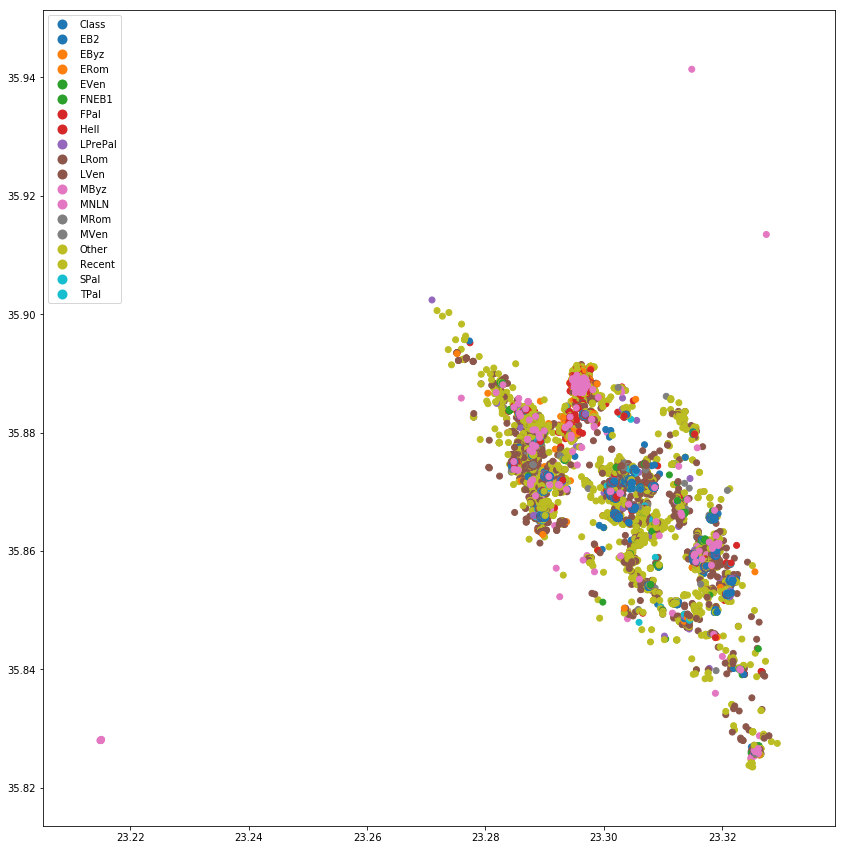

In [61]:
#Codecell_Webmaps&Distributions_PlotGeodataframes

#plot your data colouring the points by the period to which they belong. You are grouping your sites by their category label when you do this. 

#the plot requires you to define which type of data it is (categorical or numerical)
#figsize =(width, height)
gdf_survey.plot(column='colmax', categorical=True, legend=True, figsize=(15,15))

### Assess the resulting map

Is it useful? Why or why not?

Can you see the distribution of sites from individual periods easily?

Can you easily discern change over time?

I'm not overly convinced by the result here. If you think about the map design principles we discused last week, you will probably also conclude that this is not a successful map.

What other approach might we take?


Let's try something else.


In [71]:
#codecell_Webmaps&Distributions_SplittingUrData

#Maybe it would be better to only look at two or three periods at a time. 
# Recall last week's discussion about selecting appropriate data that matches our question, and also about appropriate levels of generalisation.

#let's select a subset of our periods to see change from the early bronze age to hellenistic to late roman periods
# note that some crazy abbreviations have been used for the names of periods...

# list the types (periods) of ceramics we are interested in seeing.
types = ['Arch','Hell','Class']

#define 'classic' (as in classical archaeology) as this group of periods. Create a subset of the data to contain only the types you just listed
classic = gdf_survey.loc[gdf_survey['colmax'].isin(types)]

# check you get the expected result - only sites from the periods you just defined as belonging to the 'classic' group
classic.head()

,OID_,UID,Xsugg,Ysugg,Type_,Unit,Walker,PassGrid,Section_,SherdNo,VesselPart,PartType,VesselType,OtherType,Thickness,Coarseness,MaxSize,Feature,Comments,FabricType,MNLN,FNEB1,EB2,LPrePal,FPal,SPal,TPal,PPalPG,Geom,Arch,Class,Hell,ERom,MRom,LRom,EByz,MByz,EVen,MVen,LVen,Recent,Other,DDLat,DDLon,ORIG_OID,Pass_Grid,ObjNo,Object,Material,MN_LN,FN_EB1,FMin,PPal_PG,Geometric,Archaic,TOTAL,colmax,geometry
201,NaN,1012-3-1-55-1,706932.0,3973071.4,tract,1012,3,1.0,55,1.0,H,HV,JCon,Mushroom Rim Amphora,Tk,M,10.0,Y,Mushroom amphora type ?,RBHF,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0,100,0,0,0,0,0,0,0,0,0,0,35.880051,23.292329,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hell,POINT (23.29233 35.88005)
202,NaN,1012-5-1-55-1,706962.7,3973075.4,tract,1012,5,1.0,55,1.0,Ba,BR,JCon,Rhodian amphora,M,F,5.1,Y,Rhodian amphora?,Rhodian amphora fabric?,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0,70,30,0,0,0,0,0,0,0,0,0,35.880081,23.292670,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hell,POINT (23.29267 35.88008)
210,NaN,1014-3-1-15-1,706934.8,3973207.6,tract,1014,3,1.0,15,1.0,Ba,U,JCon,Graeco-Italic Amphora?,Tk,M,9.0,Y,"Large stem, foot worn; not on tract list. Amph...",Graeco-Italic or Dressel 1 amphora fabric,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0,80,20,0,0,0,0,0,0,0,0,0,35.881278,23.292395,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hell,POINT (23.29240 35.88128)
228,NaN,1026-4-1-85-2,706973.3,3972800.2,tract,1026,4,1.0,85,2.0,Ba,U,JCon,Amphora,M,M,3.7,Y,NaN,RBHF,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0,80,20,0,0,0,0,0,0,0,0,0,35.877599,23.292716,229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hell,POINT (23.29272 35.87760)
229,NaN,1027-4-1-25-1,706974.6,3972749.4,tract,1027,4,1.0,25,1.0,H,U,JCon,Amphora,M,F,8.0,Y,NaN,RBHF,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0,100,0,0,0,0,0,0,0,0,0,0,35.877141,23.292717,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hell,POINT (23.29272 35.87714)


####Learning a new language – decomposing the code

in #codecell__Webmaps&Distributions_SplittingUrData, 


<font color='orangered'> ~ déjà vu ~</font>  the function .loc (<font color='magenta'>gdf_survey.loc~</font> ) is similar to .loc[] & .iloc[] used in pandas last week (in #codecell_makeabasicmap_BringingUrData2theMap). Note that .loc is using a label to index data whereas .iloc uses an integer position. This is the difference between working by columns or by rows. 

The <font color='magenta'>.isin()~</font> command allows you to exclude data.

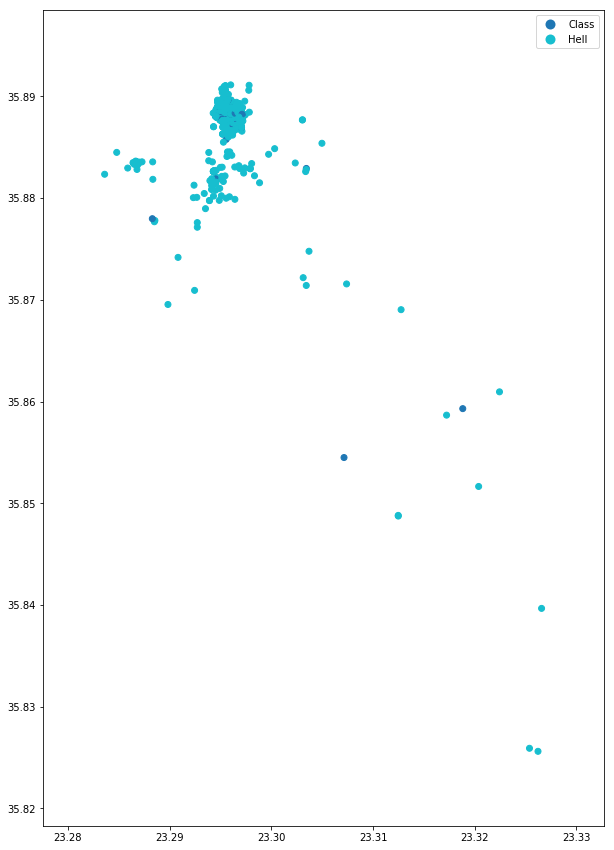

In [72]:
#codecell_Webmaps&Distributions_PlotUrData

#plot your data colouring the points by the period to which they belong
# Do this by setting 'categorical' to 'true' so that the plot is coloured by category
classic.plot(column='colmax', categorical=True, legend=True, figsize=(15,15))

## Thinking about data visualization and map design

That's a bit better perhaps. The map is less crowded.

Recall our discussions about how to design a map well. Clearly too much data introduces design problems.

Well, now we can see the distributions a bit, and maybe say something about change over time, but there are still a lot of dots, and it's pretty clear dots from some periods are hidden under dots from other periods and we have no way to separate them. 



**what we need here is:**
 * **layers, so we can group our data and work with it interactively; and,**
 * **some context for all those dots**

## To address our design problem, we will make interactive maps with layers that can be toggled on and off


In [0]:
#codecell_Webmaps&Distributions_ImportUrLibraries

#Like last time, we'll use folium and one of it's plugins. Import the tools you'll need, as usual. 
from folium.plugins import HeatMapWithTime


### Map Visualizations with Folium


To see the survey data in context and build our interactive maps, we'll start by generating the base map that will be used throughout this notebook.

'Basemaps' are generic background maps, like a satellite image or an image of the street map. You know the different backgrounds you can show on google maps? Those are 'basemaps'. <font color='orangered'> ~ déjà vu ~</font> Very much like the basemap imported folium.Map (#codecell_makeabasicmap_BringingUrData2theMap).


Have a look around the web, and you'll see that most modern online maps  use a basemap, so we're going to do so as well.


In [74]:
#codecell_Webmaps&Distributions_BringingUrData2theMap

#get the survey area centre, like you did last week, so you can centre the map where the data is located

location_survey=survey_data_maxtime['DDLat'].mean(), survey_data_maxtime['DDLon'].mean()
print(location_survey)


(35.870086207930626, 23.301798820980512)


In [0]:
#define a basemap we can reuse. Use the coordiantes for the centre you generated just above to centre the basemap
#This is a variant on how we did things last time...

def generateBaseMap(default_location=[35.870086207930626, 23.301798820980512], default_zoom_start=11):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

### Review - basic map controls
​
Arguments:<br>
* generateBaseMap(default_location=[],default_zoom_start=) 
* location=: Define the default location to zoom at when rendering the map<br>
* zoom_start=: The zoom level that the map will default to when rendering the map<br>
* control_scale=: Shows the map scale for a given zoom level### Review - basic map controls


In [76]:
#codecell_Webmaps&Distributions_CheckingZeData 

#check the basemap is working
base_map = generateBaseMap()
base_map

In [0]:
#codecell_Webmaps&Distributions_ImportUrLibraries

#lets get the heatmap tool, like last time, let's also get a measure control so we can measure distance
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MeasureControl

# Measure controls are pretty neat. Rather than just having a scale bar, like you would in a static map, and needing to visually estimate the size of features, you can mesure them.
# The ability to measure is a benefit of moving up the 'interactivity spectrum'.

Let's start by visually comparing MRom to LRom, that is middle roman to late roman sites by putting their data in separate layers.

In [0]:
#codecell_Webmaps&Distributions_Splitting your data 

# make a layer for when each period is more than 50% likely, so you have all the sites that are probably in that period
survey_data_Class = survey_data_maxtime.loc[(survey_data_maxtime['Class'] > 50)]
survey_data_Hell = survey_data_maxtime.loc[(survey_data_maxtime['Hell'] > 50)]

# Yes, I know choosing a 50% cut-off is arbitrary. You could choose a different cut-off and change the values listed above. 
# If you do so, all your maps (and all your conclusions about change over time)  will be affected.

####Learning a new language – decomposing the code

<font color='orangered'> ~ déjà vu ~</font> in the last practical lab in ##codecell_makeabasicmap_ManipulatingyourData_UsingSymbology, you used the symbol **==** . This is similar, you are using a mathematical symbol to filter (in this case split it 2 with 50%)your dataframe: **>** greater than and **<** less than.

### The concept of layers

We've introduced a new concept here. Maps have 'layers'. Each layer contains information and can be turned on and off. Think of this like a stack of transparent paper. Each sheet of paper is a layer, and can be added to or taken away from the stack. Their order can also be changed.

<br>


<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Layers.png?raw=1" width="300"/> </div>


In [91]:
#codecell_Webmaps&Distributions_PrepareUrBasemaps_CreateLayers  


# like last time, make heatmaps, but one for each period,  put them in different layers.

# give your map a name
base_map = generateBaseMap()

# add two layers, one for each period

Class = HeatMap(data=survey_data_Class[['DDLat', 'DDLon', 'Class']].groupby(['DDLat', 'DDLon']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
Hell = HeatMap(data=survey_data_Hell[['DDLat', 'DDLon', 'Hell']].groupby(['DDLat', 'DDLon']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

#give the layers sensible names that human can read
Class.layer_name = 'Classical Distribution'
Hell.layer_name = 'Hellenistic Distribution'

# add the layer control. This is the tool that lets you turn different layers in your map on and off
folium.LayerControl().add_to(base_map)


####Learning a new language – decomposing the code

In #codecell__Webmaps&Distributions_PrepareUrBasemaps_CreateLayers: 


<font color='orangered'> ~ déjà vu ~</font> you should refer to  #codecell_makeabasicmap_ManipulatingyourData_Heatmap to review the steps taken last time. 

Last time you had used to create your heatmap using a  size-based weighting (making larger sites have larger symbols). This time you are creating two heatmaps named mrom ('Middle Roman Distribution')and erom ('Early Roman Distribution'). Because the data is located within the same island, the maps will overlap.

The layer control plugin allows you to switch on and off the visibility of one or the other (or both). Layer control () [documentation](https://python-visualization.github.io/folium/modules.html).



In [87]:
#codecell__Webmaps&Distributions_GenerateUrBasemap

#Now generate your map by calling it by its name
base_map

## An exercise

Now try and add some more layers to the map to show other periods! What other periods might it be relevant to consider if you are trying to understand change over time? Edit the cell above to add more layers, or add a new cell below and follow the steps above to make a new map, and add your extra layers to it. 

In [0]:
#codecell_makeabasicmap_ManipulatingyourData

# Here I'm doing the same thing as before but with different periods
# make a layer for when the max period is LRom or MRom to compare these periods
survey_data_lrommax = survey_data_maxtime.loc[(survey_data_maxtime['colmax'] =='LRom')]
survey_data_mrommax = survey_data_maxtime.loc[(survey_data_maxtime['colmax'] =='MRom')]

In [0]:

#codecell_Webmaps&Distributions_SplittingUrData_CreateLayers 

# like last time, make heatmaps, but one for each period,  put them in different layers
base_map = generateBaseMap()

lrommax = HeatMap(data=survey_data_lrommax[['DDLat', 'DDLon']].groupby(['DDLat', 'DDLon']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
mrommax = HeatMap(data=survey_data_mrommax[['DDLat', 'DDLon']].groupby(['DDLat', 'DDLon']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

#give the layers sensible names
lrommax.layer_name = 'Late Roman Distribution'
mrommax.layer_name = 'Middle Roman Distribution'

# add the layer control
folium.LayerControl().add_to(base_map)
base_map


# Adds a measure tool to the top right

base_map.add_child(MeasureControl())


# Making visual comparisons

Stacking two layers on top of one another is one way to visually compare distributions. Do you think it is effective in this case?

Perhaps it will be more useful to be able to view our distributions and explore them side by side, to help us compare what is happening in these two periods.


We'll import a new tool to allow us to see two maps where the views are synced - that is identical and moving together - to have another way to compare distributions.


* Once you have done this exercise, I recommend you diving in NLS website and see the differences between [overlays](https://maps.nls.uk/geo/explore/#zoom=16&lat=55.8716&lon=-4.2894&layers=1&b=1) (remember to slide the transparency cursor) and [side by side](https://maps.nls.uk/geo/explore/side-by-side/#zoom=16&lat=55.8716&lon=-4.2894&layers=1&right=BingHyb) maps.

In [0]:
# get another plugin for side by side maps
from folium.plugins import DualMap

In [0]:
# declare you are making a new map "m"

# set the location to the location of your survey, set your starting zoom
m = plugins.DualMap(location=location_survey, tiles=None, zoom_start=13)

# the dual maps plugin automatically defines two buddy maps, "m1" and "m2" which pan and zoom together

# give yourself some options in life for your base layers, add them to both maps 'm1' and 'm2' by just using "m"
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('openstreetmap').add_to(m)


# like last time, make heatmaps, one for each period,  put them in different layers
# put one layer in the left hand map 'm' and the other in the right hand map 'm2'

lrommax = HeatMap(data=survey_data_lrommax[['DDLat', 'DDLon']].groupby(['DDLat', 'DDLon']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m.m1)
mrommax = HeatMap(data=survey_data_mrommax[['DDLat', 'DDLon']].groupby(['DDLat', 'DDLon']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m.m2)

#give the layers sensible names
lrommax.layer_name = 'Late Roman Distribution'
mrommax.layer_name = 'Middle Roman Distribution'

# layer control time
folium.LayerControl(collapsed=False).add_to(m)

# Adds a measure tool to the top right

m.add_child(MeasureControl())

#draw your side by side maps

m

## visualization and interpretation

Thought exercise: The results of these two maps should be similar but slightly different. What is making the difference?

How good are you at interpreting these distributions and comparing them visually?

*This is me hinting at you that you are going to end up wanting to use statistics eventually*


 

# Think about basic principles

The principles of what we've done this week are the same as the principles of what we did last week. 

I think it's important to learn to do things more than one way, and to adapt to slightly different tools. The software and code packages used for modern spatial analysis and mapping are pretty diverse and are always developing as people improve things. It doesn't make much sense to just learn one way of making maps mechanistically. The important thing is to understand the principles and aims of what you're doing. 

Key principles from this week are:

* transforming, or re-shaping data to prepare it for mapping (or analysis)
*   visualizing categorical data
*  making layers in maps
* adding tools to toggle layer visibility
* adding tools to interactively measure things on maps






In any code package that is meant to be used for making maps, odds are good you will find a way to set the zoom level, set the centre starting location, and set the initial scale. 

You will be able to set up colour schemes, map attributes, and make layers. Knowing keywords and princples is the important thing. 

## The End

That's all for today. Be sure to save your copy of the notebook in your own repo so I can see it!

#LexiCode
In the past two practical labs, you have learned and experimented with  programming commands - !Remember to load first your libraries (folium, branca, pandas, geopandas, seaborn, matplotlib.pyplot and numpy( and some plugins (HeatMapWithTime, HeatMap, MeasureControl, PrepareUrBasemaps_CreateLayers from [folium.plugins](https://python-visualization.github.io/folium/plugins.html)) to use this new language! - that you can now reuse with your own datasets :

<br>

>Lexicode_MakingaBasicMap | Lexicode_Webmaps&Distributions
>--- | ---
>	==   () [] | pd.concat()
>.head_csv() | .dtype()
>.read_csv() | astype()
>mean()  | fillna()
>folium.Map | def return
>range() | .apply(lambda x:*function*,axis=)
>len() | pd.merge()
>iloc[]| how= , left_index= ,left_index= 
>.value_counts()| gpd.GeoDataFrame()
>if =:| geometry=gpd.points_from_xy
>elif =: |print() 
>else =:| .isin()
>folium.Marker()| classic.plot()
>folium.Icon()| generateBaseMap()
>folium.Circle| .groupby(['', ''])
>popup= | .reset_index()
>radius= |  max_zoom=
>.values.tolist() |folium.TileLayer()
> .add_to()| plugins.DualMap(location= , tiles= , zoom_start= )
>  | 
